In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_from_disk
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate

/home/kenny1208/anaconda3/envs/Torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training size: 10, Dataset shape: (10, 8)
Accuracy for size 10: 0.9060


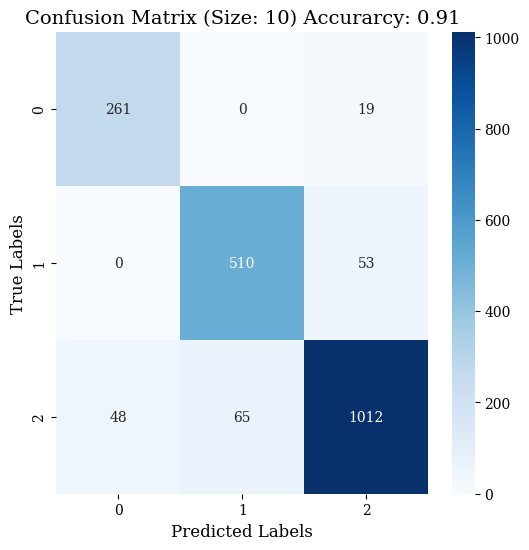

Training size: 50, Dataset shape: (50, 8)
Accuracy for size 50: 0.8908


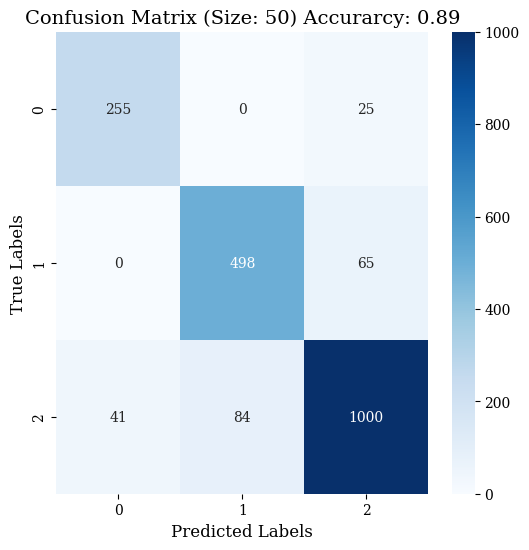

Training size: 100, Dataset shape: (100, 8)
Accuracy for size 100: 0.8938


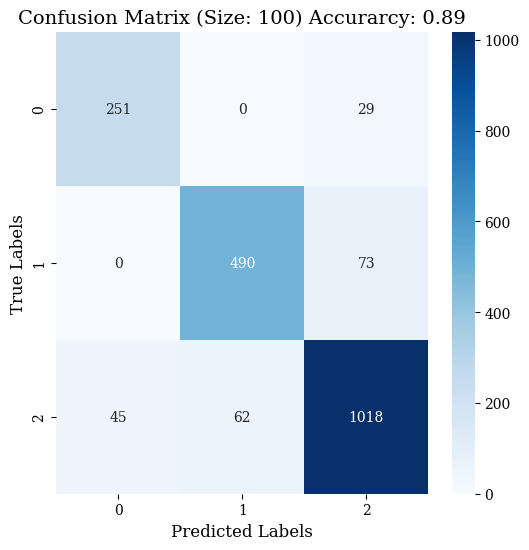

Training size: 200, Dataset shape: (200, 8)
Accuracy for size 200: 0.9070


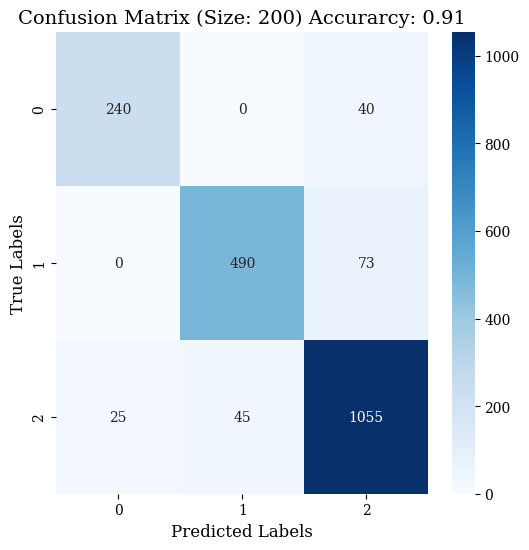

Training size: 1000, Dataset shape: (1000, 8)
Accuracy for size 1000: 0.8831


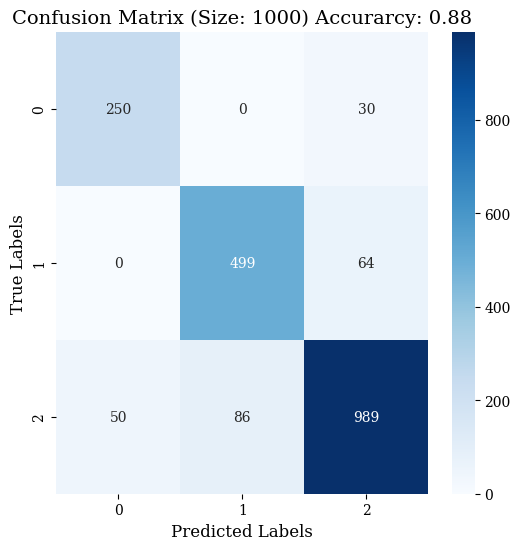

Training size: 7872, Dataset shape: (7872, 8)
Accuracy for size 7872: 0.8948


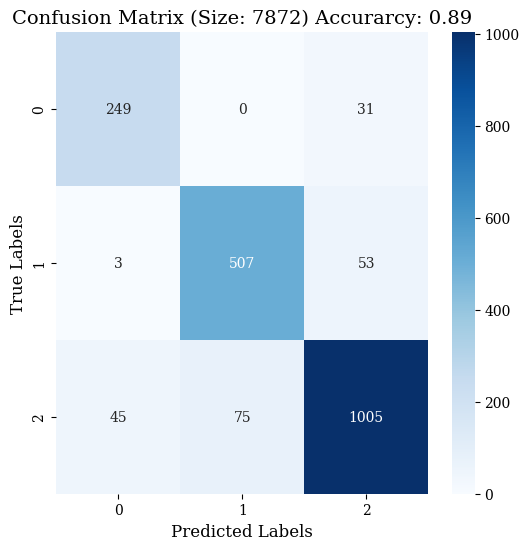

In [6]:
# Load dataset
full_dataset = load_from_disk('../data/full_dataset_new', keep_in_memory=True)

# Split dataset into training and testing (80% train, 20% test)
train_dataset, test_dataset = full_dataset.train_test_split(test_size=0.2).values()

# Get embeddings and labels for the test set
test_x = np.array(test_dataset['embedding'])  # Convert to numpy array
test_y = np.array(test_dataset['labels'])

# Define subset sizes
sizes = [10, 50, 100, 200, 1000, len(train_dataset)]

# Set Times New Roman as default font for plots
plt.rcParams["font.family"] = "serif"
accuracy_list = {}
# Iterate over different training sizes
for size in sizes:
    # Shuffle the training dataset once per iteration
    train_dataset = train_dataset.shuffle(seed=42)

    # Select a subset of the training dataset
    subdataset = train_dataset.select(range(size))
    print(f"Training size: {size}, Dataset shape: {subdataset.shape}")

    # Extract features (X) and labels (y) for training
    train_x = np.array(subdataset['embedding'])
    train_y = np.array(subdataset['labels'])

    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    knn.fit(train_x, train_y)
    

    # Make predictions
    predictions = knn.predict(test_x)

    # Compute accuracy
    accuracy = accuracy_score(test_y, predictions)
    print(f"Accuracy for size {size}: {accuracy:.4f}")

    # Generate confusion matrix
    cm = confusion_matrix(test_y, predictions)

    # Plot confusion matrix with labels
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.title(f"Confusion Matrix (Size: {size}) Accurarcy: {accuracy:.2f}", fontsize=14)
    plt.show()
    accuracy_list.update({size: accuracy})

In [7]:
print(tabulate([[size, arr] for size, arr in accuracy_list.items()], headers=["Train Size", "Accuracy"], tablefmt="fancy_grid"))


╒══════════════╤════════════╕
│   Train Size │   Accuracy │
╞══════════════╪════════════╡
│           10 │   0.905996 │
├──────────────┼────────────┤
│           50 │   0.890752 │
├──────────────┼────────────┤
│          100 │   0.893801 │
├──────────────┼────────────┤
│          200 │   0.907012 │
├──────────────┼────────────┤
│         1000 │   0.88313  │
├──────────────┼────────────┤
│         7872 │   0.894817 │
╘══════════════╧════════════╛
